In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import and read data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv("/content/drive/My Drive/vqa/Compasbias/compas-scores-two-years.csv")

In [ ]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0




---



---



---



##### At the beggining we should clean the data. that means we should drop unusbale columns(the columns that they don't give us efficient information) and also should remove the features that they have the lot of null values because we can not fill them with correct value in this project i drop the columns that over the 80 percent of their values are nan.and during the clean dataset we should pay attention to type of datas because it is very important that they are in correct format.



---



---



---





The below code show us the information of our dataset that conclude types of featres's value and also show nan values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

sum of the null values for each column and we can underestand that some features are completely nulls

In [ ]:
df.isnull().sum()

,0
id,0
name,0
first,0
last,0
compas_screening_date,0
sex,0
dob,0
age,0
age_cat,0
race,0




---


## # Drop the columns more than 80 percent nan values


---



In [ ]:
threshold = 0.8

non_missing_ratio = df.notna().mean()

df_cleaned = df.loc[:, non_missing_ratio > threshold]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            



---



# Drop variables that are not needed that they don't give us valuable information



---



In [ ]:
columns_to_drop = ['id','name', 'first', 'last', 'in_custody', 'vr_charge_desc', 'r_case_number', 'vr_charge_degree',
                   'c_offense_date', 'c_case_number', 'r_offense_date', 'juv_other_count', 'end', 'event',
                   'screening_date', 'start', 'juv_misd_count', 'juv_fel_count', 'r_days_from_arrest',
                   'r_charge_degree', 'days_b_screening_arrest', 'vr_case_number', 'priors_count.1', 'r_jail_out',
                   'c_arrest_date', 'r_charge_desc', 'r_jail_in', 'violent_recid', 'decile_score.1',
                   'vr_offense_date', 'out_custody','dob','compas_screening_date']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   7214 non-null   object 
 1   age                   7214 non-null   int64  
 2   age_cat               7214 non-null   object 
 3   race                  7214 non-null   object 
 4   decile_score          7214 non-null   int64  
 5   priors_count          7214 non-null   int64  
 6   c_jail_in             6907 non-null   object 
 7   c_jail_out            6907 non-null   object 
 8   c_days_from_compas    7192 non-null   float64
 9   c_charge_degree       7214 non-null   object 
 10  c_charge_desc         7185 non-null   object 
 11  is_recid              7214 non-null   int64  
 12  is_violent_recid      7214 non-null   int64  
 13  type_of_assessment    7214 non-null   object 
 14  score_text            7214 non-null   object 
 15  v_type_of_assessment 

In [ ]:
df_violent_parsed=df

In [ ]:
df_violent_parsed.isnull().sum()

,0
sex,0
age,0
age_cat,0
race,0
decile_score,0
priors_count,0
c_jail_in,307
c_jail_out,307
c_days_from_compas,22
c_charge_degree,0


### We create the days-in-jail column according to c_jail_in	and c_jail_in

In [ ]:
df_violent_parsed['c_jail_in'] = pd.to_datetime(df_violent_parsed['c_jail_in'])
df_violent_parsed['c_jail_out'] = pd.to_datetime(df_violent_parsed['c_jail_out'])

df_violent_parsed['days_in_jail'] = abs((df_violent_parsed['c_jail_out'] - df_violent_parsed['c_jail_in']).dt.days)

According df.info() seperate categorical and numerical features that they have nan valuese and try to fill them with specific approach


---



In [ ]:
numeric_cols = ['c_days_from_compas', 'v_decile_score',]
for col in numeric_cols:
    df_violent_parsed[col].fillna(df_violent_parsed[col].median(), inplace=True) ## fillna replaces missing (NaN) values with the median of that column # median() is used because it is robust to outliers, unlike the mean

# Impute missing values for categorical variables # fillna replaces missing (NaN) values with the mode
categorical_cols = ['c_charge_degree', 'score_text', 'v_score_text', 'c_jail_in', 'c_jail_out', 'c_charge_desc', 'days_in_jail']
for col in categorical_cols:
    df_violent_parsed[col].fillna(df_violent_parsed[col].mode()[0], inplace=True)

print(df_violent_parsed.isnull().sum())

sex                     0
age                     0
age_cat                 0
race                    0
decile_score            0
priors_count            0
c_jail_in               0
c_jail_out              0
c_days_from_compas      0
c_charge_degree         0
c_charge_desc           0
is_recid                0
is_violent_recid        0
type_of_assessment      0
score_text              0
v_type_of_assessment    0
v_decile_score          0
v_score_text            0
v_screening_date        0
two_year_recid          0
days_in_jail            0
dtype: int64


In [ ]:
df_violent_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   7214 non-null   object 
 1   age                   7214 non-null   int64  
 2   age_cat               7214 non-null   object 
 3   race                  7214 non-null   object 
 4   decile_score          7214 non-null   int64  
 5   priors_count          7214 non-null   int64  
 6   c_jail_in             7214 non-null   object 
 7   c_jail_out            7214 non-null   object 
 8   c_days_from_compas    7214 non-null   float64
 9   c_charge_degree       7214 non-null   object 
 10  c_charge_desc         7214 non-null   object 
 11  is_recid              7214 non-null   int64  
 12  is_violent_recid      7214 non-null   int64  
 13  type_of_assessment    7214 non-null   object 
 14  score_text            7214 non-null   object 
 15  v_type_of_assessment 

In [ ]:
df_violent_parsed.head()

,sex,age,age_cat,race,decile_score,priors_count,c_jail_in,c_jail_out,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,is_violent_recid,type_of_assessment,score_text,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,two_year_recid
0,Male,69,Greater than 45,Other,1,0,2013-08-13 06:03:42,2013-08-14 05:41:20,1.0,F,Aggravated Assault w/Firearm,0,0,Risk of Recidivism,Low,Risk of Violence,1,Low,2013-08-14,0
1,Male,34,25 - 45,African-American,3,0,2013-01-26 03:45:27,2013-02-05 05:36:53,1.0,F,Felony Battery w/Prior Convict,1,1,Risk of Recidivism,Low,Risk of Violence,1,Low,2013-01-27,1
2,Male,24,Less than 25,African-American,4,4,2013-04-13 04:58:34,2013-04-14 07:02:04,1.0,F,Possession of Cocaine,1,0,Risk of Recidivism,Low,Risk of Violence,3,Low,2013-04-14,1
3,Male,23,Less than 25,African-American,8,1,2013-01-01 01:31:55,2013-09-12 10:31:00,1.0,F,Possession of Cannabis,0,0,Risk of Recidivism,High,Risk of Violence,6,Medium,2013-01-13,0
4,Male,43,25 - 45,Other,1,2,2013-01-01 01:31:55,2013-09-12 10:31:00,76.0,F,arrest case no charge,0,0,Risk of Recidivism,Low,Risk of Violence,1,Low,2013-03-26,0


### the below heatmap show us the correlation between features and we should pay attention the correlation between input features and target column
as we see below the column two-year-recid has high correlation with our target (is_recid) so we should drop it because if we use it in our model it cuase that our model is overfitting and the model could heavily rely on it, reducing the importance of other features and also about decil-score and v-decil score if we use both of them it cuase Multicollinearity  

## Note : The heatmap only show the correlation between numeric features

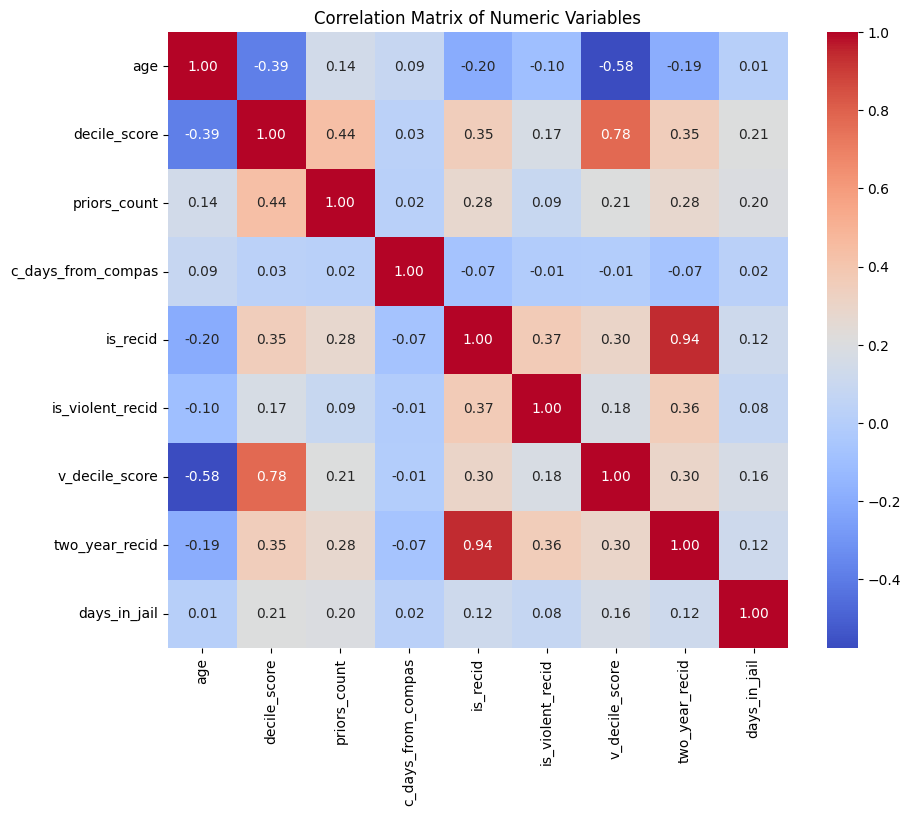

In [ ]:
numeric_variables = df_violent_parsed.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_variables.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()



---



---


## And finally we narrow down the features that we need

In [ ]:
df=df_violent_parsed[['age', 'sex', 'decile_score', 'priors_count', 'race', 'days_in_jail','c_days_from_compas', 'is_violent_recid','is_recid']]


### Save the final data as csv file and we use it for next tasks

In [ ]:
df.to_csv('/content/drive/My Drive/vqa/Compasbias/finaldata.csv')



---



---



---



---


## Explority Data analysis

The below plot show the number of each race according to gender

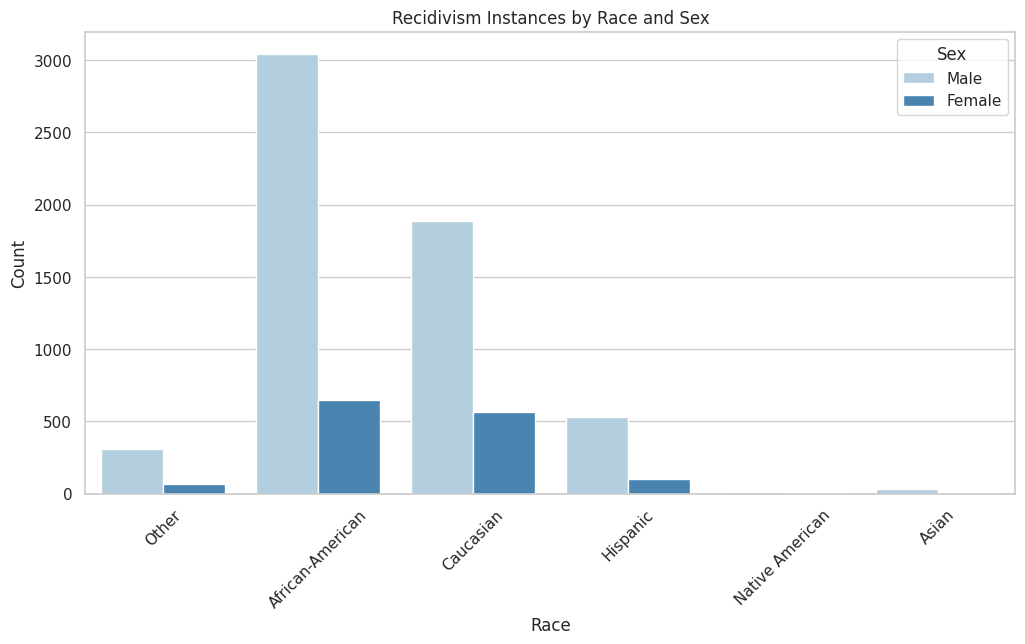

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_violent_parsed, x='race', hue='sex', palette='Blues', hue_order=['Male', 'Female'])
plt.title('Recidivism Instances by Race and Sex')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.show()

the below plots show the distribution of count of races for each dicil score

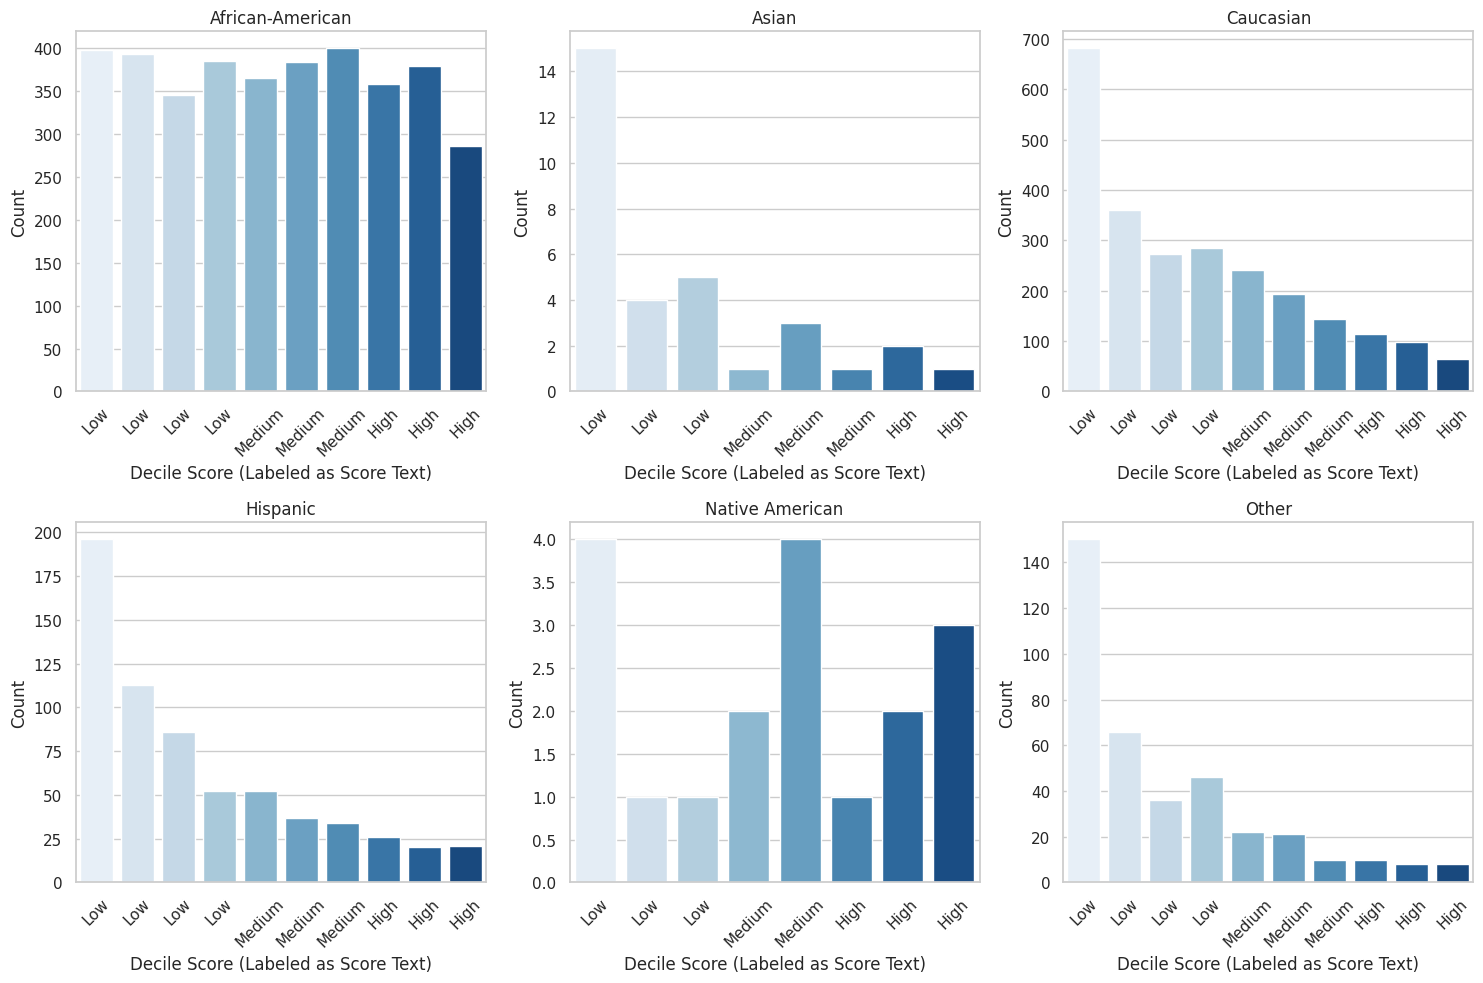

In [ ]:
racial_groups = ['African-American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']

sns.set(style="whitegrid")

# Create a grid of count plots for each race's decile scores
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, race in enumerate(racial_groups):
    # Filter the dataframe for the current racial group
    race_data = df_violent_parsed[df_violent_parsed['race'] == race]

    # Create a count plot for the decile scores of the current racial group
    sns.countplot(x='decile_score', data=race_data, ax=axes[i], palette='Blues')
    axes[i].set_title(race)

    unique_deciles = sorted(race_data['decile_score'].unique())
    unique_labels = [race_data[race_data['decile_score'] == score]['score_text'].iloc[0]
                     for score in unique_deciles]
    axes[i].set_xticks(range(len(unique_deciles)))
    axes[i].set_xticklabels(unique_labels, rotation=45)

    axes[i].set_xlabel('Decile Score (Labeled as Score Text)')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()
